In [262]:
# the libraries we need

from sklearn.model_selection import train_test_split
from  sklearn.preprocessing import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas as pd
from scipy.stats import loguniform
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import scikitplot as skplt
from nba_predictions.utilities.support import shuffle_dataset, load_data, get_features_labels_from_df, print_model_metrics
from nba_predictions.utilities.data_processing import get_robust_scaled_data
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
import nba_predictions.utilities.plot_utilities as plot_utilities
sns.set()

## Load Dataset
Load the nba 10 recent perfomances dataset and divide features and labels

In [263]:
nba_df = load_data('../datasets/final_data/nba_10_recent_perfomance.csv', 'GAME_DATE', 'WINNER')

In [264]:
nba_df = shuffle_dataset(nba_df)

Divide the dataset into features and labels

In [265]:
cols_to_delete = ['GAME_DATE', 'GAME_ID', 'H_NAME', 'A_NAME', 'SEASON', 'WINNER']
features, labels = get_features_labels_from_df(nba_df, cols_to_delete, 'WINNER')

Take out from dataset a 20% of the data to use them at the final stage of project

In [266]:
features, X_test, labels, y_test = train_test_split(features, labels, test_size=0.20, random_state=42,
                                                    shuffle=True)

## Apply a RobustScaler to the features
Scale features using statistics that are robust to *outliers*.

In [267]:
#features_scaled = get_robust_scaled_data(features)
robust_scaler = RobustScaler()
robust_scaler.fit(features)
features_scaled = pd.DataFrame(robust_scaler.transform(features), columns=features.columns, index=features.index)

Transform with robust scaler also the test data that we use at the end of project

In [268]:
X_test = pd.DataFrame(robust_scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

## Balance the dataset with SMOTE and TOMEK-LiNK


In [269]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler, SMOTE
# transform the dataset
oversample = SMOTETomek(random_state=42)
features_scaled, labels = oversample.fit_resample(features_scaled, labels)

<Figure size 2304x1728 with 0 Axes>

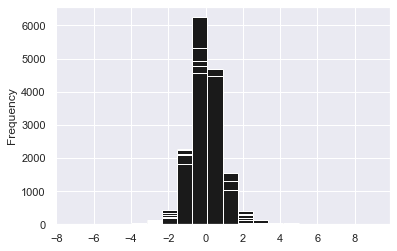

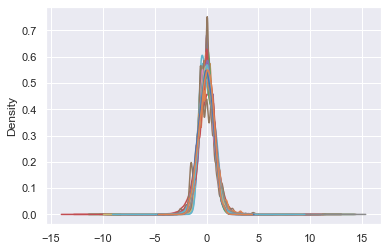

In [270]:
plot_utilities.plot_data_distribution(features_scaled)

## Logistic Regression
First, I used a LR from sklearn to train the model.
To obtain the best hyperparameters I used a RandomizedSearch

In [296]:
param = {
    "dual" : [False, True],
    "C" : loguniform(1e-5, 1000),
    "tol" : np.random.uniform(0.6, .9, 100),
    'solver' : ['liblinear', 'newtong-cg', 'saga', 'lbfgs'],
    'fit_intercept' : [False, True],
    'penalty' : ['l1', 'l2'],
}

# random search logistic regression model on the sonar dataset
# define model
model = (LogisticRegression(random_state=42))
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# define search
search = RandomizedSearchCV(model, param, scoring='roc_auc', n_jobs=-1, cv=cv, random_state=42, verbose=0)
# execute search
result = search.fit(features_scaled, labels)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.730087587115339
Best Hyperparameters: {'C': 0.05421296322041317, 'dual': False, 'fit_intercept': False, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.8430633405917928}


/Users/biagiolicari/miniforge3/envs/workspace/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
240 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/biagiolicari/miniforge3/envs/workspace/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/biagiolicari/miniforge3/envs/workspace/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/biagiolicari/miniforge3/env

In [297]:
param = {
    "dual" : [False, True],
    "C" : np.random.uniform(0.01, 0.5, 1000),
    "tol" : np.random.uniform(0.6, .9, 100),
    'solver' : ['liblinear', 'newtong-cg', 'saga', 'lbfgs'],
    'fit_intercept' : [False, True],
    'penalty' : ['l1', 'l2'],
}

# random search logistic regression model on the sonar dataset
# define model
model = (LogisticRegression(random_state=42))
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# define search
search = RandomizedSearchCV(model, param, scoring='roc_auc', n_jobs=-1, cv=cv, random_state=42, verbose=0)
# execute search
result = search.fit(features_scaled, labels)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7313060911285655
Best Hyperparameters: {'tol': 0.6512956576760954, 'solver': 'lbfgs', 'penalty': 'l2', 'fit_intercept': True, 'dual': False, 'C': 0.18616090331830623}


/Users/biagiolicari/miniforge3/envs/workspace/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/biagiolicari/miniforge3/envs/workspace/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/biagiolicari/miniforge3/envs/workspace/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/biagiolicari/miniforge3/env

In [298]:
search.best_estimator_

LogisticRegression(C=0.18616090331830623, random_state=42,
                   tol=0.6512956576760954)

Execute the cross validation score with a stratifiedKfold to assess the best model obtained from randomized search

In [299]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
log_regr_model = search.best_estimator_
scores = cross_val_score(log_regr_model, features_scaled, labels, cv=cv, scoring='accuracy')
print('std: %s' % scores.std())
print('mean: %s' % scores.mean())
print(scores)

std: 0.014215249566987111
mean: 0.6704523139123529
[0.66858553 0.68421053 0.65596708 0.66337449 0.67901235 0.66090535
 0.67160494 0.68395062 0.67489712 0.66831276 0.68092105 0.64884868
 0.64938272 0.66831276 0.68477366 0.66337449 0.70288066 0.6691358
 0.64938272 0.6962963  0.66036184 0.67023026 0.66831276 0.66255144
 0.66337449 0.65349794 0.67489712 0.6872428  0.6962963  0.6526749 ]


In [301]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
log_regr_model = search.best_estimator_
scores = cross_val_score(log_regr_model, features_scaled, labels, cv=cv, scoring='roc_auc')
print('std: %s' % scores.std())
print('mean: %s' % scores.mean())
print(scores)

std: 0.013709841149982067
mean: 0.7313060911285655
[0.72563193 0.7525699  0.71945721 0.72344847 0.74604396 0.71251517
 0.73328438 0.73628663 0.74363782 0.73208402 0.73276273 0.72209628
 0.70680872 0.7283312  0.74002319 0.72453232 0.75043896 0.73530033
 0.72202051 0.75225169 0.71364536 0.73976909 0.73201357 0.70920673
 0.73372063 0.71545782 0.74088756 0.74238056 0.7595514  0.71302458]


## Test the model to get prediction and % of an event
test on the data not used in training

In [302]:
log_regr_model.fit(features_scaled, labels)

LogisticRegression(C=0.18616090331830623, random_state=42,
                   tol=0.6512956576760954)

In [303]:
log_regr_predict = pd.DataFrame(log_regr_model.predict(X_test), index=X_test.index)
log_reg_prediction_prob = pd.DataFrame(log_regr_model.predict_proba(X_test), index=X_test.index)

In [304]:
print(f'Classification report : \n {metrics.classification_report(y_test, log_regr_predict)}')

Classification report : 
               precision    recall  f1-score   support

           0       0.56      0.64      0.60      1140
           1       0.73      0.66      0.69      1689

    accuracy                           0.65      2829
   macro avg       0.64      0.65      0.64      2829
weighted avg       0.66      0.65      0.65      2829



In [305]:
print_model_metrics(y_test, log_regr_predict, log_reg_prediction_prob[1])

F1 Score: 0.69
Accuracy Score: 0.65
AUC Score: 0.695
Precision Score: 0.731
Recall Score: 0.659


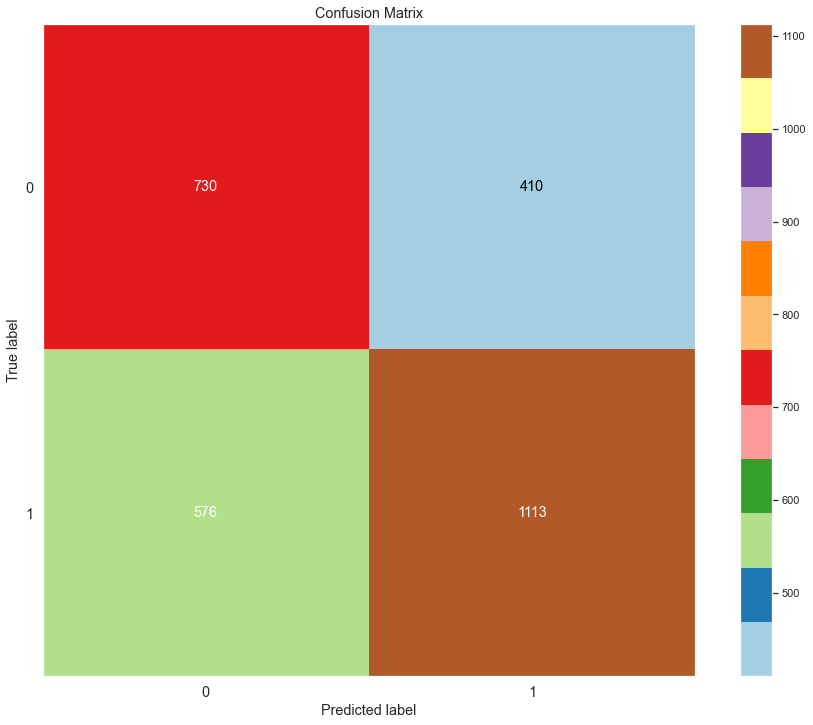

In [306]:
plot_utilities.plot_confusion_matrix(y_test, log_regr_predict, title='Confusion Matrix')

## Learning curve of the model

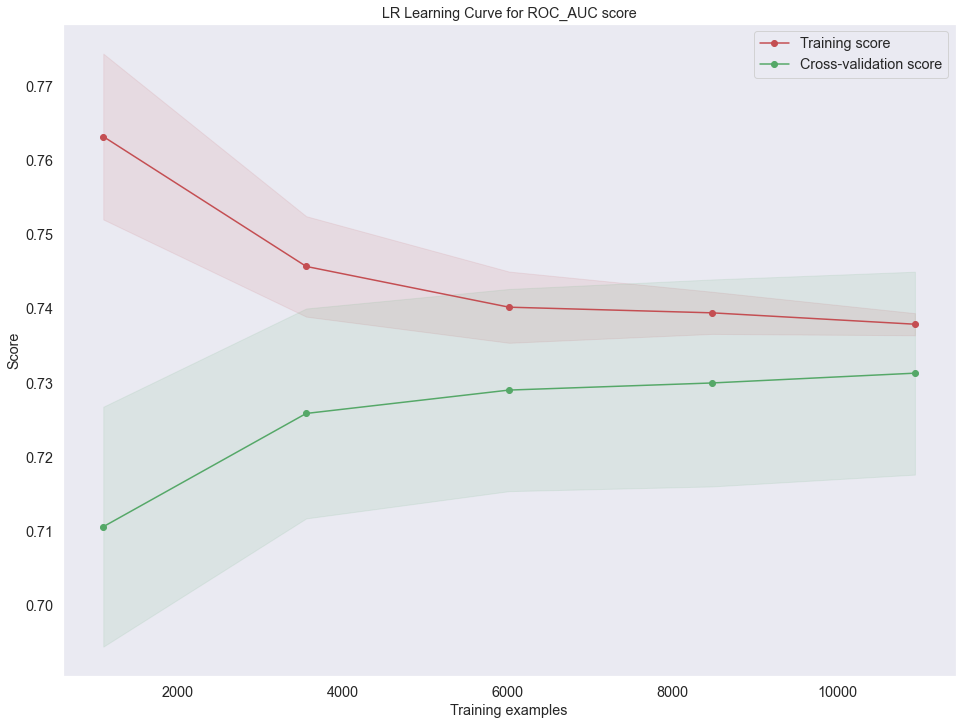

In [307]:
plot_utilities.plot_learning_curve(model=log_regr_model,
                                   X_train=features_scaled,
                                   y_train=labels,
                                   cv=cv,
                                   scoring='roc_auc',
                                   title="LR Learning Curve for ROC_AUC score")

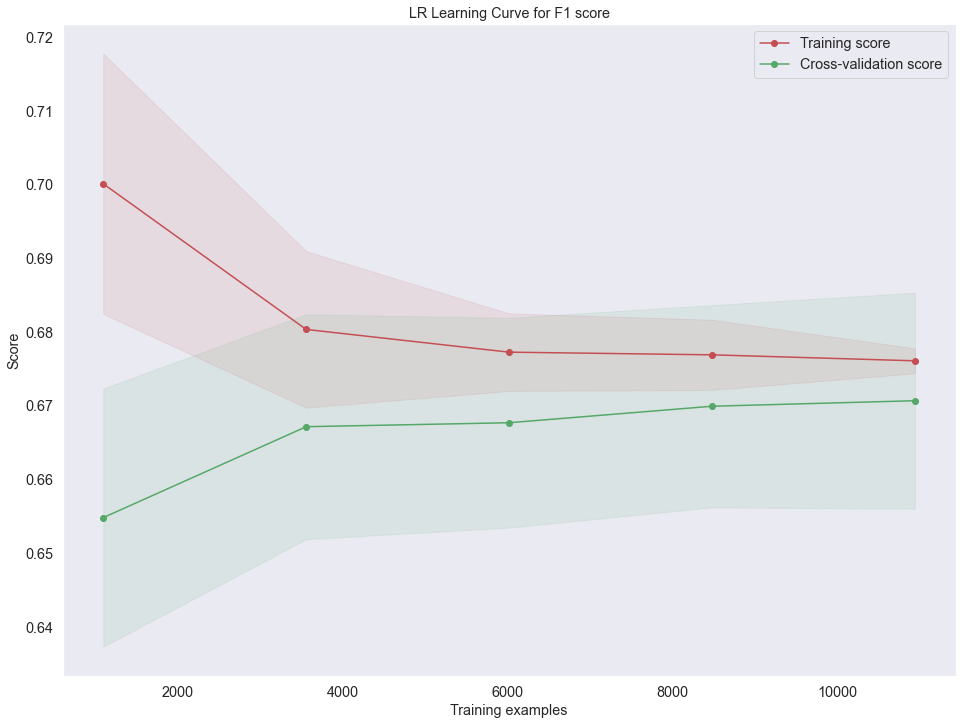

In [308]:
plot_utilities.plot_learning_curve(model=log_regr_model,
                                   X_train=features_scaled,
                                   y_train=labels,
                                   cv=cv,
                                   scoring='f1',
                                   title="LR Learning Curve for F1 score")

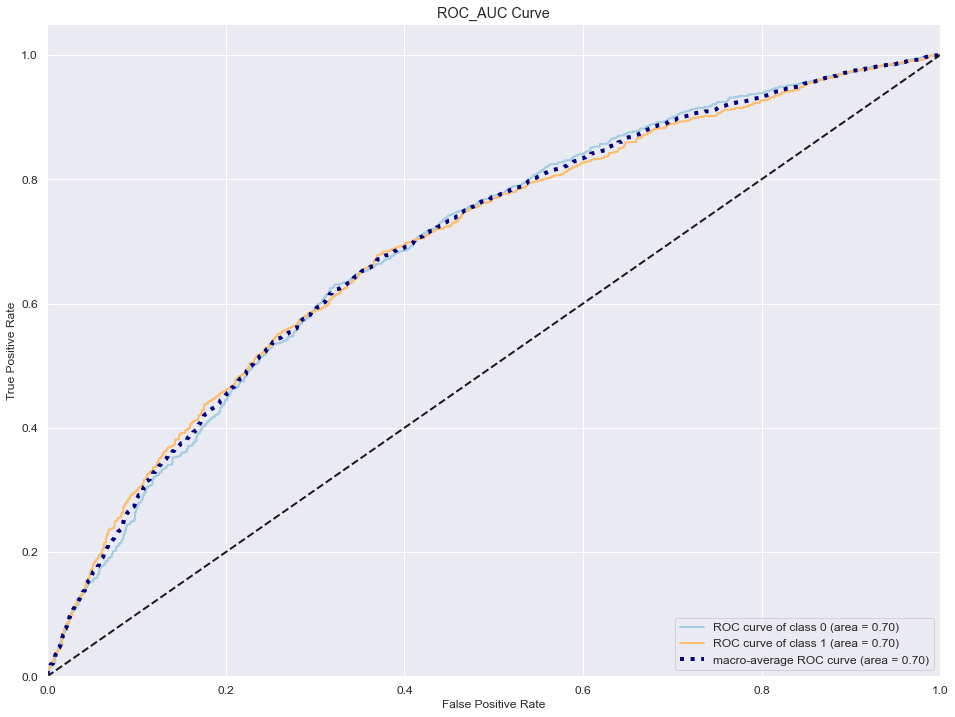

In [309]:
plot_utilities.plot_roc_auc_curve(y_test, log_reg_prediction_prob, title='ROC_AUC Curve')

### Create a new dataframe with result obtained from prediction and the games

In [310]:
def get_prediction_df(pred_prob, pred, full_df):
    concat = [pred_prob, pred]
    final_prediction = pd.concat(concat, axis=1, ignore_index=False)
    final_prediction.columns = ['AWAY_WIN_PROBABILITY', 'HOME_WIN_PROBABILITY', 'RESULT_PREDICTION']
    final_prediction['RESULT_PREDICTION'] = final_prediction['RESULT_PREDICTION']\
        .apply(lambda value: 'Away Team Win' if value == 0 else 'Home Team Win')
    final_prediction = pd.merge(full_df.iloc[:, 1:5], final_prediction, left_index=True, right_index=True)
    return final_prediction

final_prediction_nba_log_regr = get_prediction_df(log_reg_prediction_prob, log_regr_predict, nba_df)
final_prediction_nba_log_regr

,GAME_ID,H_NAME,A_NAME,SEASON,AWAY_WIN_PROBABILITY,HOME_WIN_PROBABILITY,RESULT_PREDICTION
8,21401081,HOU,MIN,2014,0.166947,0.833053,Home Team Win
14,21400636,GSW,HOU,2014,0.318170,0.681830,Home Team Win
15,41800174,UTA,HOU,2018,0.604006,0.395994,Away Team Win
19,21900886,LAC,DEN,2019,0.558950,0.441050,Away Team Win
31,21700263,OKC,GSW,2017,0.769448,0.230552,Away Team Win
...,...,...,...,...,...,...,...
14124,21800321,DET,CHI,2018,0.337465,0.662535,Home Team Win
14126,21100381,NOP,CHI,2011,0.849146,0.150854,Away Team Win
14133,22000790,ORL,IND,2020,0.717739,0.282261,Away Team Win
14137,21801023,TOR,LAL,2018,0.267669,0.732331,Home Team Win
